# WALK	: Web Archives for Longitudinal Research

"WALK will enable present and future humanities and social science scholars to access, interpret and curate born-digital primary resources that document our recent past."

This is a demo/tutorial for the **University of Toronto** on our up-to-now explorations on Web Archives.

Over the summer, I have had the pleasure of working with Dr. Ian Milligan and Nick Ruest, building a tool for conducting analytics on the Web Archive collections. This has involved working with [Warcbase](http://lintool.github.io/warcbase-docs/) in order to extract important data from the collections and using Python including the pandas / numpy libraries via Anaconda, a framework intended for analytics-style work.

I have called this tool / library *Compare* because it uses Warcbase derivative data from the archives / WARC files.

Compare uses Multiple Correspondence Analysis (MCA) to explore relationships among different collections of data. It is like factor analysis.  I have a demo of MCA [using parliamentary committees and MPs as a sample.](https://github.com/web-archive-group/WALK/blob/master/Scripts/compare_collection/UnderstandingMCA.ipynb). 


In [1]:
#First let's import the necessary libraries.
%matplotlib inline
from Compare import Compare # The Compare class
import os #file operations
from collections import defaultdict #complex dictionaries
import matplotlib.pyplot as plt #plotting library
from mpl_toolkits.mplot3d import Axes3D #for 3d graphs
import copy #need deepcopy() for working with the dictionaries.

####   Uncomment the items below if you want 
####   to use D3 for output.

#import mpld3
#mpld3.enable_notebook()


While many questions could be answered using MCA, we have decided to focus on a simple problem statement: ***Can we conduct an evaluation of a collection of web archives using data analytics?*** For this demo, I have included a number of items:

- Two 'dummy' collections (HUMANITIES COMPUTING & UNIVERSITY OF TORONTO T-SPACE)
- Two 'external' collections (UofA prairie provinces & UVIC environmental organizations)
- Three Twitter crawls.
- University of Toronto collections (4 in all)

While there are a number of ways we could compare the collections, this example will use web domain names (urls). Often MCA tries to compare both factors (collections *and* urls) but including the urls would be too difficult. (Besides, do we really need to understand why www.youtube.com is in multiple collections?)  The urls will be represented by off-white squares and no labels to keep them from confusing the analysis.

We assume that libraries will continue not to count format as a selection criteria, meaning that web archives are selected on the same criteria as books, journals or any other source. We have decided to focus on the following principles of collection management, however:

- Coverage / Scope
  + What are the best ways to evaluate coverage?
- Accuracy
  + Can we detect problems (eg. ineffective crawls)
- Relevance
  + Is a historian likely to find something unique or interesting in the collection?
- Dynamics
  + How has the collection changed from crawl to crawl?


In [2]:
# The output below takes the derivative files from the folder "UFT/" and puts them into a python dictionary (array)
# for later use.  I have included two of these. One including the Heritage Community Foundation's collection and one
# not.

path = "UFT/"

def processCollection (path):
    #initialise vars:
    urls = []
    #establish the data folder
    for filename in os.listdir(path):
        with open(path+filename, "r") as file:
            print (filename) #see the filenames available.
            urls.append(list({(filename[0:10], line.translate(str.maketrans(')'," ")).split(",")[0][2:6], line.translate(str.maketrans(')'," ")).split(",")[1]) for line in file.readlines()}))
    return(urls)

#newdict = defaultdict(dict)
newdict = defaultdict(lambda: defaultdict(list))
newdict2 = defaultdict(lambda: defaultdict(list))
PC = processCollection(path)
#print(list(zip(PC[0])))
#print(list(zip(PC[0][0])))
#print (**collect)
for collect in PC:
    for coll, date, url in collect:
        newdict[date][coll].append(url)

# newdict will provide all the data like so:

#{'DATE': {'COLLECTION': ['url1.com', 'url2.com', 'etc']}}
#

 

TORONTO_toronto_mayoral_election_2014-urls.txt
WAHR_exln42-all.txt
ALBERTA_humanities_computing-all.txt
TORONTO_canadian_labour_unions-urls.txt
WAHR_panamapapers_all_urls.txt
UVIC_environmental_organizations_and_resources_of_bc-urls.txt
ALBERTA_prarie_provinces-all.txt
TORONTO_CPP
TORONTO_canadian_government_information-urls.txt
WAHR_ymmfire-urls.txt
TORONTO_federal_election_candidate_sites_2015-urls.txt
TORONTO_toronto_2015_pan_am_parapan_american_games-urls.txt
TORONTO_snowden_archive-urls.txt
TORONTO_tspace-urls.txt


In [3]:
## Produce a dictionary output that creates a list of outputs suitable for analysis by date.
##
## collection_var[-1] would analyze all the links together until the latest year (2016). collection_var[-2]
## would analyze everything up to t-1 (2015).
##
## Our hope for the future is that the data could be used in an animation, showing changes over time. But for now, 
## we will just show the progress.

def add_two_collections (col1, col2):
    # This takes two collections and combines them into one.
    col_1 = col1.copy()
    for coll, values in col2.items():
        #print(values)
        try:
            col_1[coll] = set(col_1[coll])
            col_1[coll].update(set(values)) 
            col_1[coll] = list(col_1[coll])
        except KeyError:
            col_1[coll] = list(values)       
    return col_1

def reduce_collections (dictionary):
    dict_list = []
    fulllist = {}
    dict2 = copy.deepcopy(dictionary)
    for x, y in sorted(dict2.items()):
        #print(x)
        n = dictionary.pop(x)
        if len(dict_list) < 1:
            dict_list.append(n)
        #print(n)
        else:
            dict_list.append((add_two_collections(dict_list[-1], n)))
        #print(dict_list)
    return(dict_list)

collection_var = reduce_collections (copy.deepcopy(newdict))

# Collection var is a list of dictionaries starting from the earliest to the latest. The later dictionaries
# are accumulations of the former.


First we will start with the earliest date (2011). Two collections have data listed for these dates.

- Canadian Labor Unions
- Prairie Provinces (UofA)

When there are fewer than 3 collections, you get a venn diagram showing the cross-connections. You can also extract data using V2_AB object or V3_ABC (if there are three items).

There are 31 members in common. They are : {'blogs.law.harvard.edu ', 'www.thestar.com ', 'twitter.com ', 'feeds.feedburner.com ', 'wp.me ', 'www.google.com ', 'www.petroleumnews.com ', 'www.w3.org ', 'www.surveymonkey.com ', 'purl.org ', 'www.cbc.ca ', '1.gravatar.com ', 'www.winnipegfreepress.com ', '0.gravatar.com ', 'web.resource.org ', 'bit.ly ', 'support.google.com ', 'www.macromedia.com ', 'www.apple.com ', 'activex.microsoft.com ', 'qtinstall.apple.com ', 'a123.g.akamai.net ', 'accounts.google.com ', 'youtu.be ', 'gmpg.org ', 'www.flickr.com ', 'www.youtube.com ', 'get.adobe.com ', 'www.adobe.com ', 'm.youtube.com ', 'www.ustream.tv '}


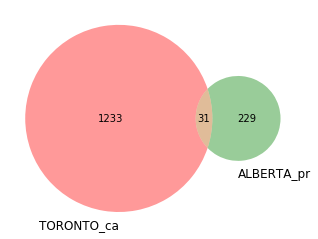

In [4]:
UFT = Compare(collection_var[-6])
print("There are "+ str(len(UFT.V2_AB)) + " members in common. They are : " + str(UFT.V2_AB))

In 2012, both collections grew, but the Alberta provinces grew more. Perhaps some content analysis or a Q-sort could be done to analyse what changed?

There are 175 members in common. They are : {'mail.google.com ', 'blogs.law.harvard.edu ', 'www.canoe.ca ', 'www.alberta.cupe.ca ', 'students.washington.edu ', 'bp0.blogger.com ', 'www.metronews.ca ', 'maps.google.ca ', 'w.soundcloud.com ', 'www.rcmp-grc.gc.ca ', 'www.nald.ca ', 'purl.org ', 'www.progressive-economics.ca ', 'www.aflcio.org ', '1.gravatar.com ', 'www.winnipegfreepress.com ', '0.gravatar.com ', 'web.resource.org ', 'www.tbs-sct.gc.ca ', 'www.cep.ca ', 'dublincore.org ', 'www.nursesunions.ca ', 'aupe.org ', 'laws-lois.justice.gc.ca ', 'www.justice.gc.ca ', 'www.microsoft.com ', '1.bp.blogspot.com ', 'www.hrsdc.gc.ca ', 'qtinstall.apple.com ', 'www.aenweb.ca ', 'www.clac.ca ', 'www.myspace.com ', 'www.pialberta.org ', 'youtu.be ', 'www.savealbertahospital.com ', 'www.blogger.com ', 'friendsofmedicare.org ', 'cupe.ca ', 'maps.google.com ', 'www.wcb.ab.ca ', 'www.youtube.com ', 'get.adobe.com ', 'en.wikipedia.org ', 'metronews.ca ', 'schemas.xmlsoap.org ', 'www.ipetitions.co

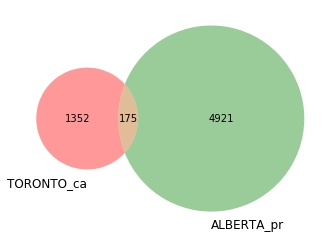

In [5]:
UFT = Compare(collection_var[-5])
print("There are "+ str(len(UFT.V2_AB)) + " members in common. They are : " + str(UFT.V2_AB))

In 2013, University of Alberta's humanities collection started.  Now we have three collections and can switch to a size-three venn digram.



There are 7 members in common. They are : {'purl.org ', '1.gravatar.com ', '0.gravatar.com ', 'www.youtube.com ', 'web.resource.org ', 'dublincore.org ', 'gmpg.org '}


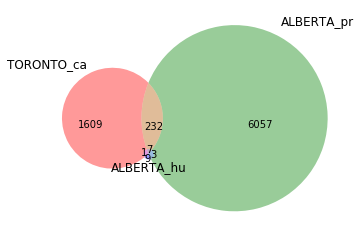

In [6]:
UFT = Compare(collection_var[-4])
print("There are "+ str(len(UFT.V3_ABC)) + " members in common. They are : " + str(UFT.V3_ABC))

In 2014, we have four collections and move to correspondence analysis.  (Scroll down for more descriptions, as 2015 is much more interesting).  So far the main item of interest is that the Prairie Provinces and Canadian Labor Unions collections have more in common with each other than with the other two collections.

To analyse, I suggest a three pronged approach.

- HA: What does the horizontal axis mean?
- VA: What does the vertical axis mean?
- QUA: Can we name the quadrants?
- CLUS: What sources have clustered together

HA-VA-QUA-CLUS!

['TORONTO_ca', 'ALBERTA_pr', 'UVIC_envir', 'ALBERTA_hu']
[ 0.13089157  0.07780444  0.00048908]


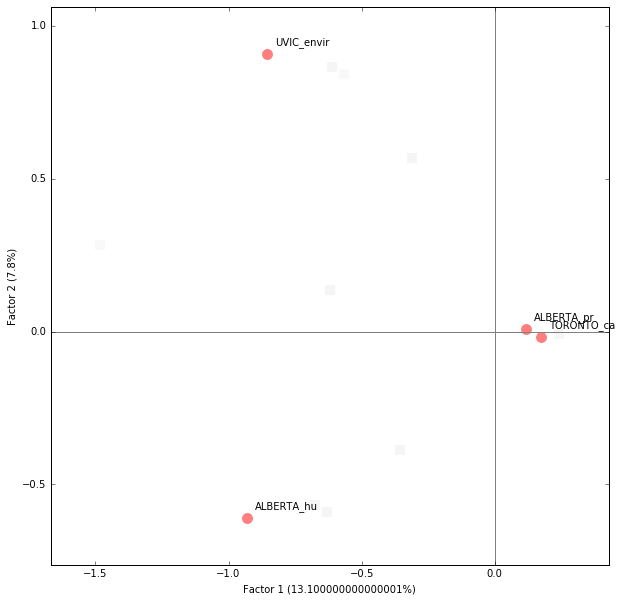

In [7]:
compare1 = Compare(collection_var[-3]) #2014

In 2015, most of the new collections have been introduced. The factor differences are quite low, suggesting that the differences in terms of link sharing are not very pronounced.  Consider that most websites in this era will include the usual adobe, youtube, twitter, facebook and other social media links. While this information may be obvious to us now, a historian 50 years from now may be able to use this to confirm the importance (or the extent of the importance) of sites like YouTube on web collections. 

HA: Maybe global (snowden) to local (Toronto pan-am-games)?  Also the dummy collections on are the left.
VA: Maybe humanities to social sciences?
QUA: 

|               |               |
| :------------ |:-------------:|
| T-SPACE       | POLITICS      |
| INDIV. RIGHTS | ORGANIZATIONS |

CLUS: Definitely a political cluster, but the others are not very explanatory yet.

['TORONTO_ca', 'ALBERTA_hu', 'TORONTO_sn', 'TORONTO_CP', 'ALBERTA_pr', 'TORONTO_ts', 'UVIC_envir', 'TORONTO_to']
[ 0.12665725  0.09005775  0.06020946  0.04140288  0.03192666  0.02254604
  0.00952532]


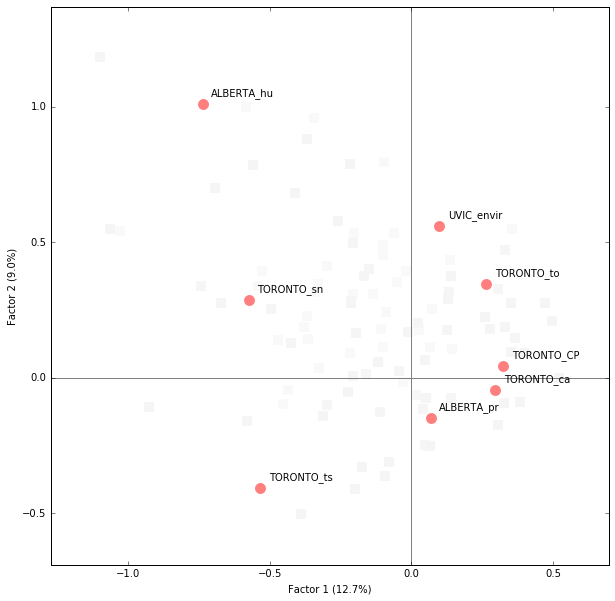

In [8]:
Compare(collection_var[-2]) #2015

Now that some Twitter collections have been included, the analysis is a bit more meaningful.  The way to look at this graph is to examine the horizontal axis, which accounts for 30% of the difference among the collections.  There is a clear deliniation between the Twitter collections (+ TSpace) and the web archives.  On the vertical axis (17% of the explanation) there is a shift between the Fort McMurray Fires and Tspace.

HA: Twitter to archives.
VA: Local (bottom) to global (top)
QUA: Toronto collections

['TORONTO_ca', 'TORONTO_sn', 'TORONTO_CP', 'ALBERTA_pr', 'TORONTO_ts', 'TORONTO_to', 'WAHR_ymmfi', 'ALBERTA_hu', 'WAHR_exln4', 'WAHR_panam', 'UVIC_envir']
[ 0.30226812  0.17239078  0.08823745  0.07212333  0.06243202  0.0534882
  0.04319945  0.03585088  0.02918545  0.01404752]


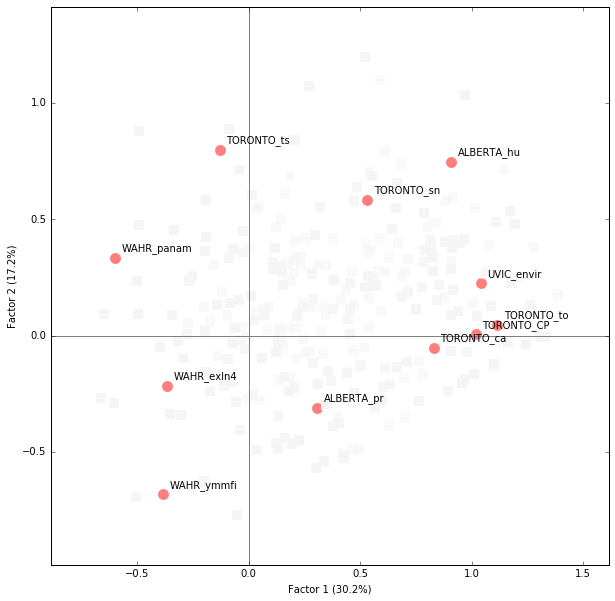

In [9]:
Compare(collection_var[-1]) #2016

In [ ]:
TestDict1 = {'2009': {'c1': {'lk1', 'lk2', 'lk3'},
                     'c2': {'lk1', 'lk10', 'lk20', 'lk2'},
                     'c3': {'lk3', 'lk10', 'lk33', 'lk4'}},
            '2010': {'c1': {'lk3', 'lk5', 'lk6'},
                    'c3': {'lk10', 'lk9', 'lk7'}},
            '2011': {'c1': {'lk3', 'lk5', 'lk6'},
                    'c4': {'lk1', 'lk2', 'lk3'}},
            '2012': {'c1': {'lk1', 'lk99', 'lk6'}}
           }

#print(list(zip(*zip(TestDict['2009'])))